In [1]:
#Importing the dataset
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import seaborn
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from IPython.display import Image  
from sklearn import tree
#from dtreeplt import dtreeplt
import pydotplus
import pydot
from matplotlib.legend_handler import HandlerLine2D
import os
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from IPython.display import Image

df = pd.read_csv("breast-cancer-wisconsin.csv", low_memory = False)

In [2]:
!pip install pydotplus
!pip install pydot
#pip install git+https://github.com/nekoumei/dtreeplt.git

In [3]:
#Checking for nulls
df.isnull().sum().max

<bound method Series.max of id_number                       0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial__Cell_Size    0
Bare_Nuclei                     0
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64>

In [4]:
# Dropping id_number
df=df.drop('id_number', axis=1)
df

Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_Adhesion  Single_Epithelial__Cell_Size Bare_Nuclei  \
0                    1                             2           1   
1                    5                             7          10   
2                    1                             2           2   
3                    1                             3           4   
4                    3                             2           1   
..                 ...                           ...         ...   
694                  1                             3           2   
695                  1                             2           1   
696                  3                             7           3   
697                  4                             3           4   
698                  5                             4           5   

     Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
694                1                1        1      2  
695                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[699 rows x 10 columns]

In [5]:
df['Class'] = (df['Class'] > 3).astype(int)
df

Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_Adhesion  Single_Epithelial__Cell_Size Bare_Nuclei  \
0                    1                             2           1   
1                    5                             7          10   
2                    1                             2           2   
3                    1                             3           4   
4                    3                             2           1   
..                 ...                           ...         ...   
694                  1                             3           2   
695                  1                             2           1   
696                  3                             7           3   
697                  4                             3           4   
698                  5                             4           5   

     Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                  3                1        1      0  
1                  3                2        1      0  
2                  3                1        1      0  
3                  3                7        1      0  
4                  3                1        1      0  
..               ...              ...      ...    ...  
694                1                1        1      0  
695                1                1        1      0  
696                8               10        2      1  
697               10                6        1      1  
698               10                4        1      1  

[699 rows x 10 columns]

In [6]:
df['Bare_Nuclei'].astype(str)
df = df[(df != '?').all(axis=1)]
df.shape

(683, 10)

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape

(683, 9)

In [8]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [9]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [10]:
dtc_cv_score = cross_val_score(dtc, X, y, cv=10)

In [11]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("Accuracy: Single Decisiton Tree",metrics.accuracy_score(y_test, y_pred))

=== Confusion Matrix ===
[[88  1]
 [ 4 44]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.92      0.95        48

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137



Accuracy: Single Decisiton Tree 0.9635036496350365


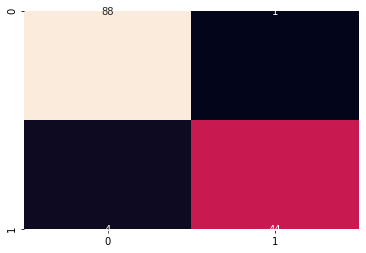

In [12]:
cm_dtc=confusion_matrix(y_test, y_pred)
seaborn.heatmap(cm_dtc, annot=True,cbar=False)
plt.show()

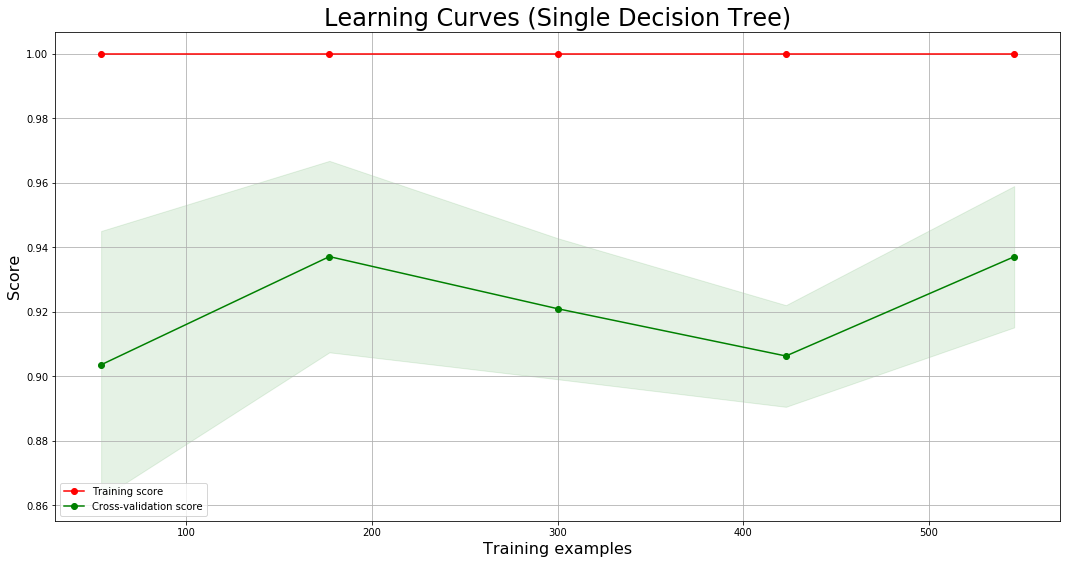

In [13]:
def plot_learning_curve(dtc, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
   
    plt.figure(figsize=(18,9))
    plt.title(title, fontsize=24)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    train_sizes, train_scores, test_scores = learning_curve(
        dtc, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Single Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(dtc, title, X, y, cv=5)

plt.show()

In [14]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

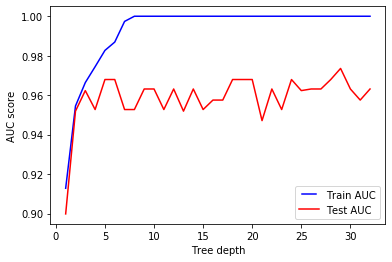

<Figure size 1440x720 with 0 Axes>

In [15]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dtc = DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
    dtc.fit(X_train, y_train)
    train_pred = dtc.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dtc.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.figure(figsize=(20,10))
plt.show()

In [16]:
features=list(df.columns.values)
target=features[-1]
features=features[0:-1]

In [17]:
# Create DOT data
#dtree = dtreeplt(dtc, feature_names=features,target_names=target)

# Draw graph
#fig = dtree.view() 

In [18]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/bin'

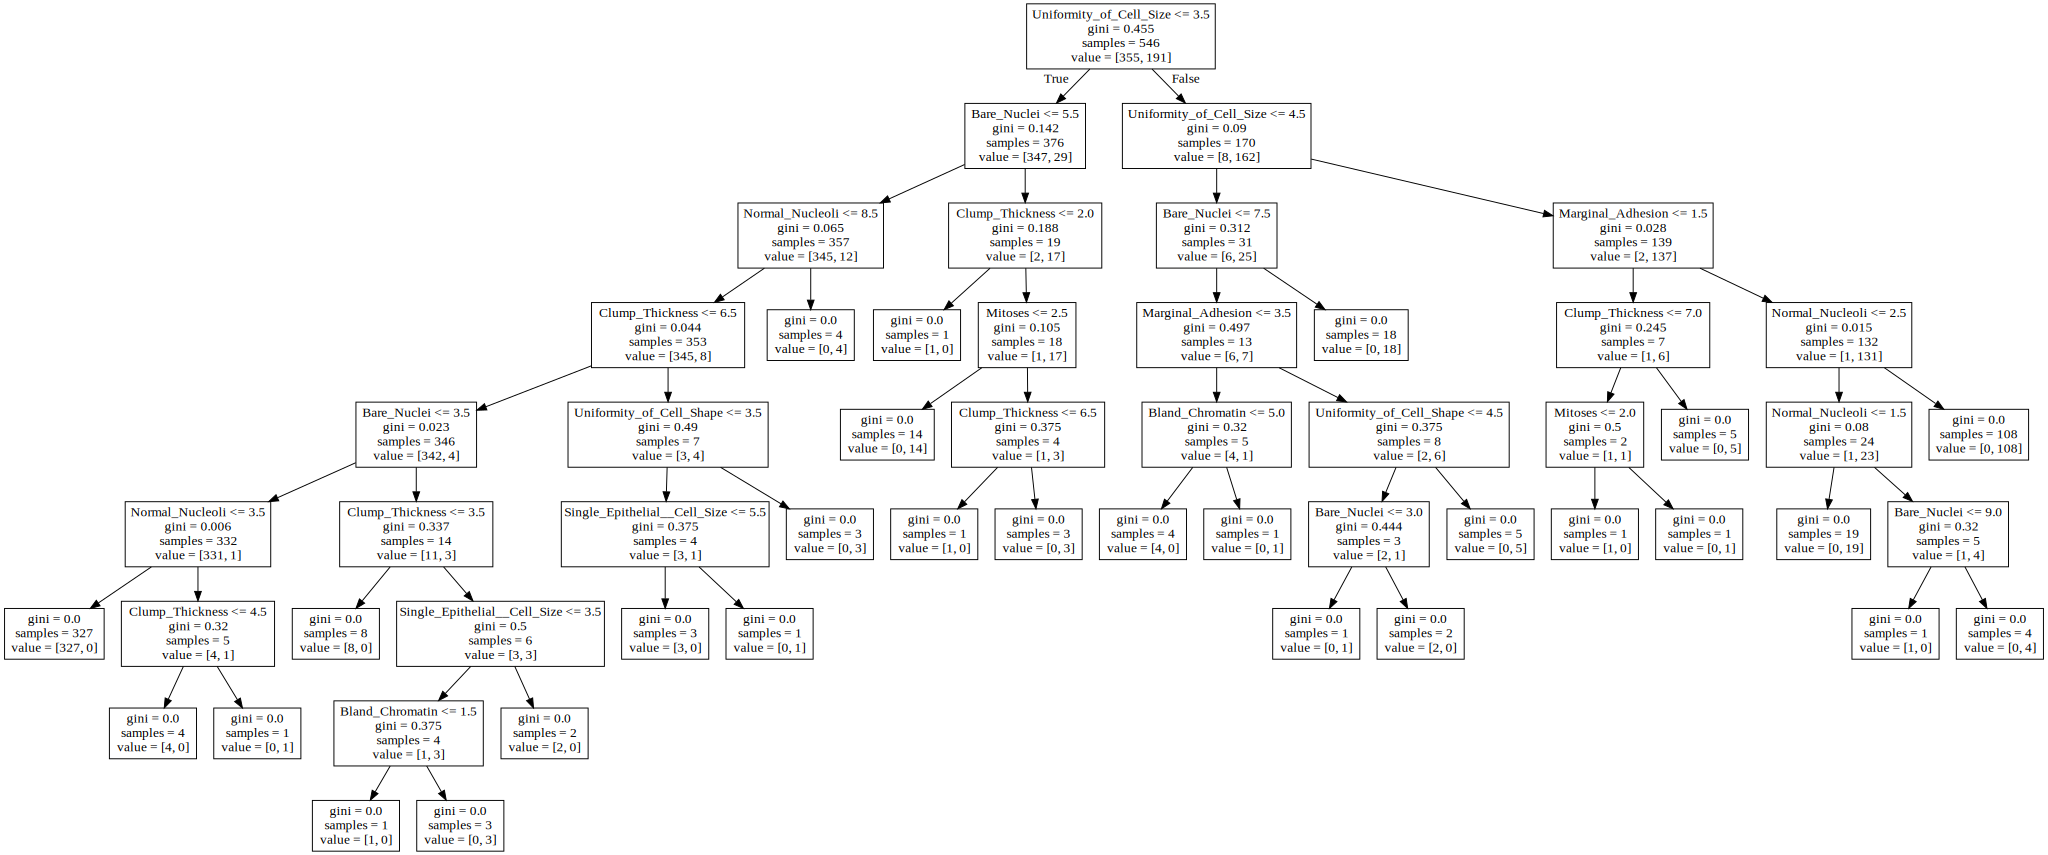

In [19]:
graph = Source( export_graphviz(dtc, out_file=None, feature_names=X.columns))
graph

In [20]:
graph.format = 'png'

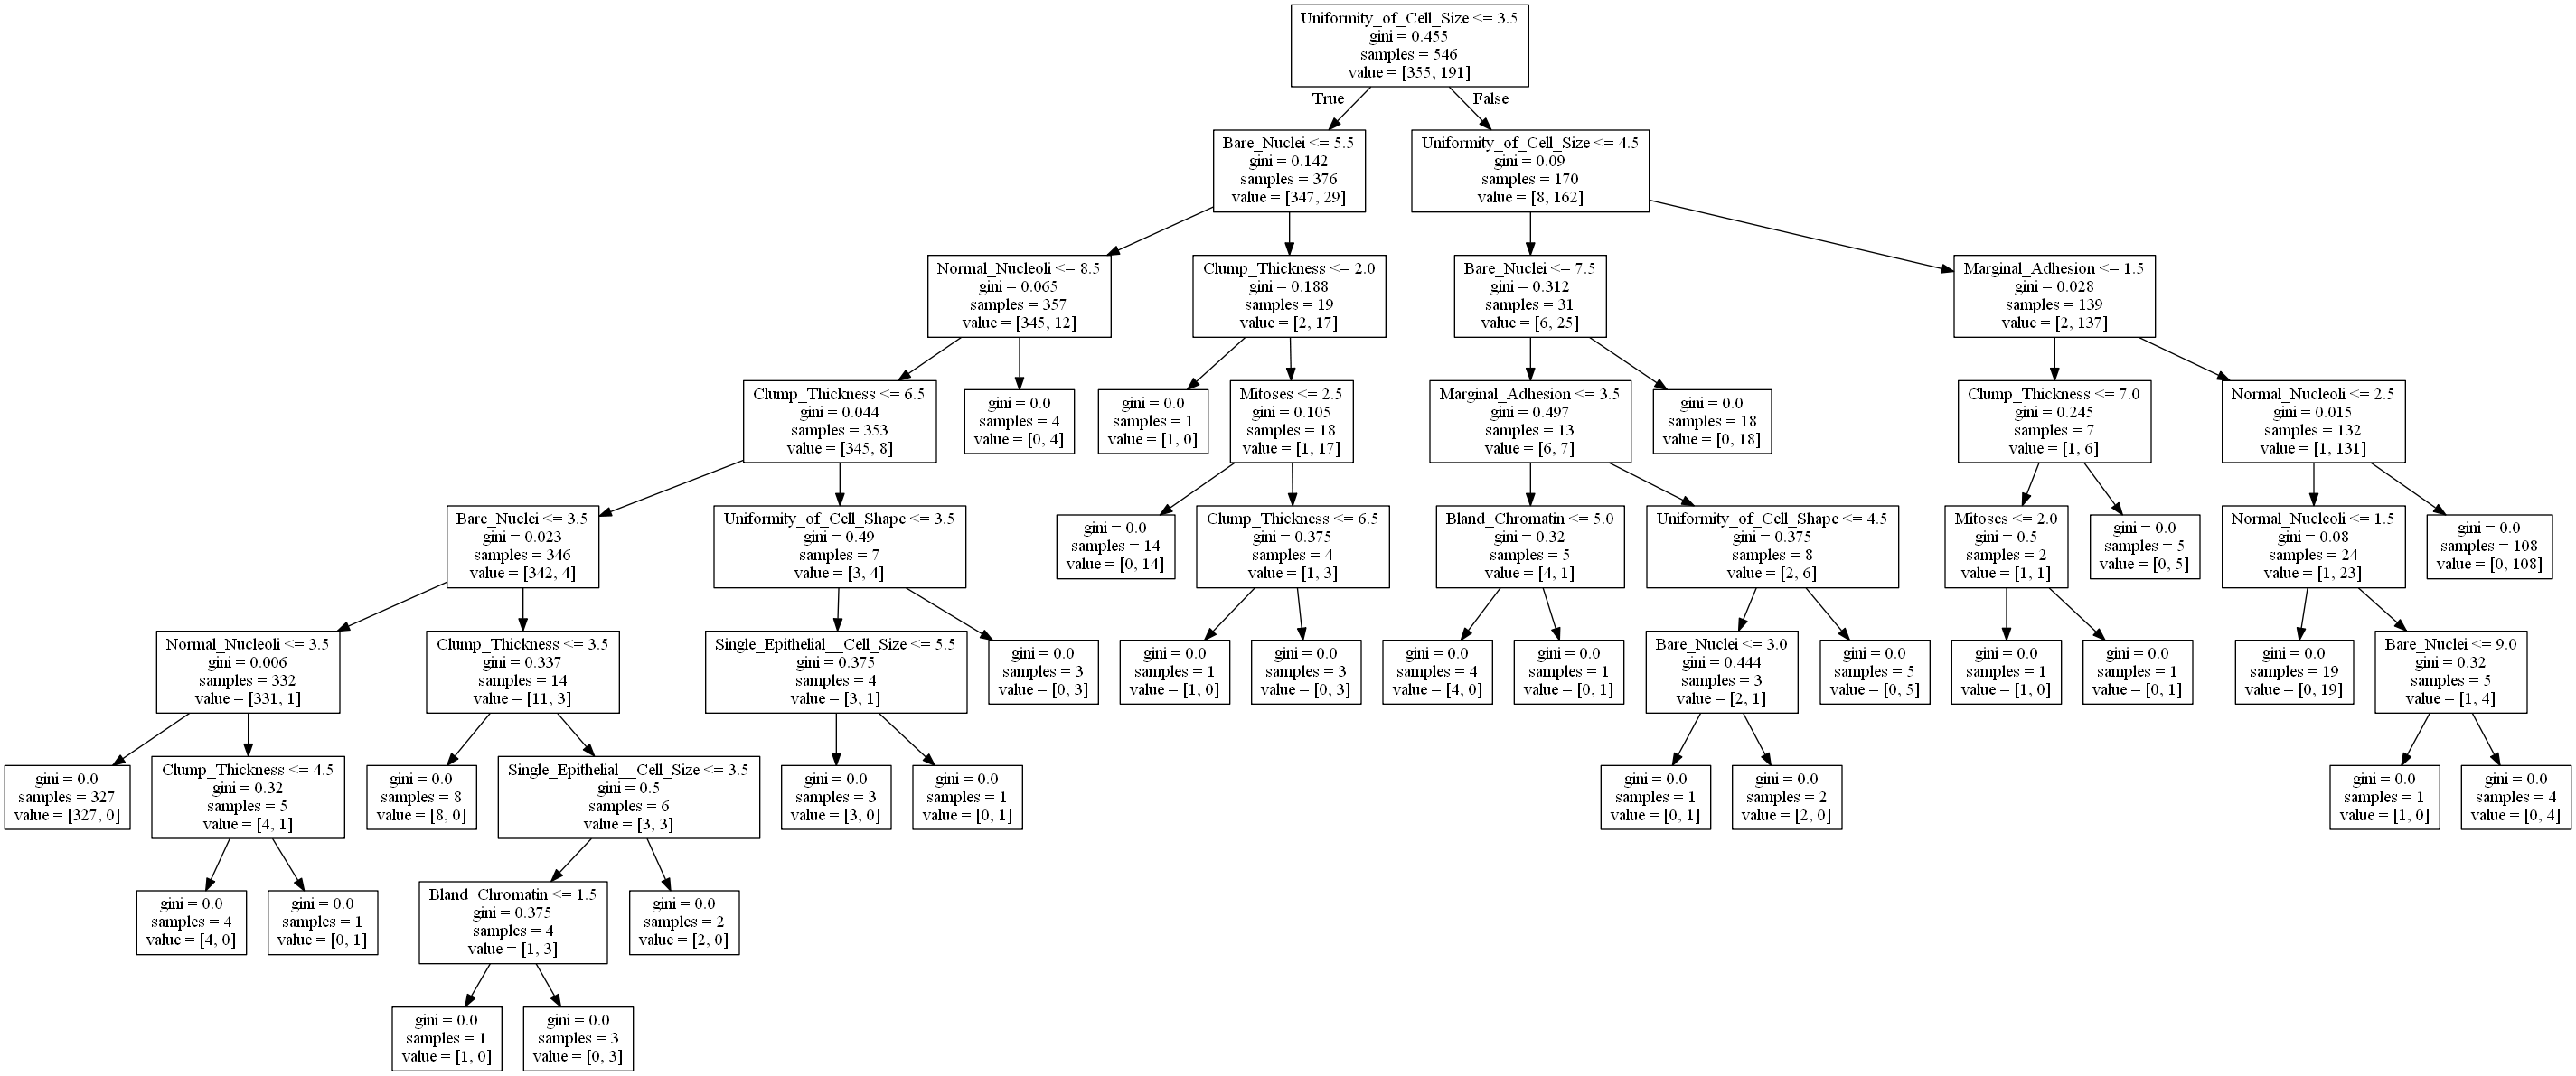

In [21]:
png_byte = graph.pipe(format='png')
Image(png_byte)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5, criterion='gini')
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

In [23]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10)

In [24]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("Accuracy: Random Forest",metrics.accuracy_score(y_test, y_pred))

=== Confusion Matrix ===
[[87  2]
 [ 2 46]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        48

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



Accuracy: Random Forest 0.9708029197080292


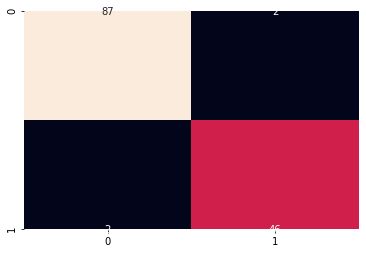

In [25]:
cm_rfc=confusion_matrix(y_test, y_pred)
seaborn.heatmap(cm_rfc, annot=True,cbar=False)
plt.show()

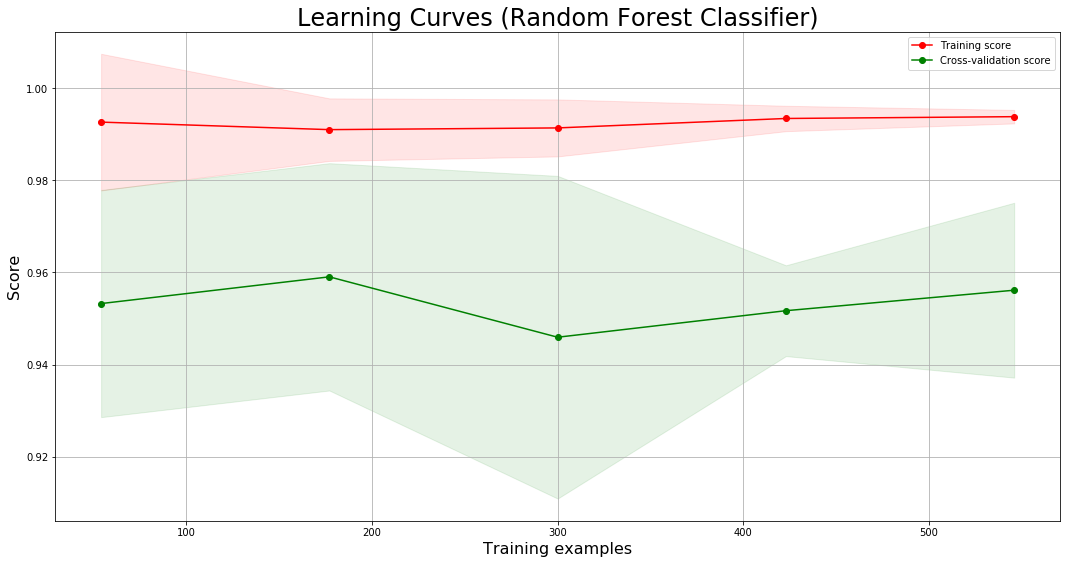

In [26]:
def plot_learning_curve(rfc, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
   
    plt.figure(figsize=(18,9))
    plt.title(title, fontsize=24)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    train_sizes, train_scores, test_scores = learning_curve(
        rfc, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(rfc, title, X, y, cv=5)

plt.show()

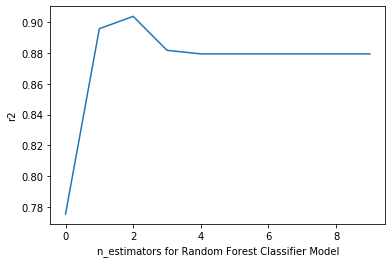

In [27]:
# plot showing incresing R² as n_estimators is increased from 1 to 9.
preds = np.stack([t.predict(X_test) for t in rfc.estimators_])
plt.ylabel("r2")
plt.xlabel("n_estimators for Random Forest Classifier Model")
preds[:,0], np.mean(preds[:,0])
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

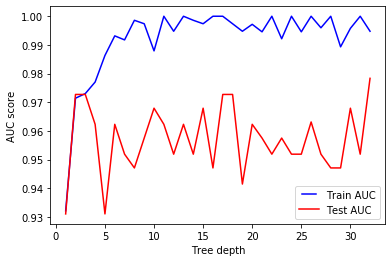

In [28]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth, criterion='gini')
    rfc.fit(X_train, y_train)
    train_pred = rfc.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = rfc.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [29]:
# Extract single tree
estimator = rfc.estimators_[2]



# Export as dot file
export_graphviz(estimator, out_file='tree.dot',feature_names=X.columns, 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook

Image(filename = 'tree.png')

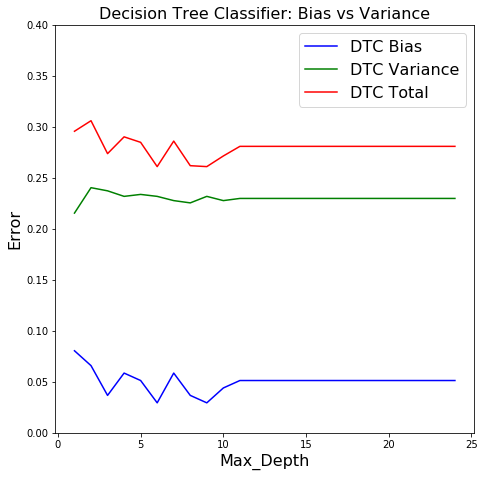

In [31]:
#Bias and Variance Functions

def bias(y_predict,y):
    y_predict = np.array(y_predict)
    y = np.array(y)
    return np.mean(np.power((y_predict-y),2))

def variance(y_predict,y):
    y_predict = np.array(y_predict)
    return np.var(y_predict)

#Decision Tree Classification Bias and Variance
max_depth_DTC = np.arange(1,25)

bias_DTC = []
var_DTC = []
err_DTC = []

err_DTC_list_test = []
err_DTC_list_training = []
err_tot_DTC_list = []

model_DTC = DecisionTreeClassifier(random_state=42)
model_DTC.set_params(criterion = 'gini', 
                 max_depth = 4,
                 max_features = 'sqrt')

for entry in max_depth_DTC:
    model_DTC.set_params(max_depth = entry)
    model_DTC.fit(X_train, y_train)
    predicted_y_DTC_test = model_DTC.predict(X_test)
    predicted_y_DTC_train = model_DTC.predict(X_train)
    bias_DTC.append(bias(predicted_y_DTC_test,y_test))
    var_DTC.append(variance(predicted_y_DTC_test,y_test))
    err_DTC.append(bias(predicted_y_DTC_test,y_test)+variance(predicted_y_DTC_test,y_test))
    
    err_DT_test_variable =mean_squared_error(y_test,predicted_y_DTC_test)
    err_DT_training_variable = mean_squared_error(y_train, predicted_y_DTC_train)
    err_DT_tot_variable = err_DT_test_variable + err_DT_training_variable
    err_DTC_list_test.append(err_DT_test_variable)
    err_DTC_list_training.append(err_DT_training_variable)
    err_tot_DTC_list.append(err_DT_tot_variable)
    
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_DTC, bias_DTC,color='b')
plt.plot(max_depth_DTC, var_DTC,color='g')
plt.plot(max_depth_DTC, err_DTC,color='r')
plt.legend(['DTC Bias', 'DTC Variance', 'DTC Total'], loc='upper right',fontsize=16)
plt.title('Decision Tree Classifier: Bias vs Variance',fontsize=16)
plt.ylabel('Error',fontsize=16)
plt.xlabel('Max_Depth',fontsize=16)
plt.ylim(0,0.4)
plt.show()